Equation 1: 3x^5 - 6x^2 + 11x - 6 - Newton-Raphson Method Root: 0.80772, found in 2 iterations.


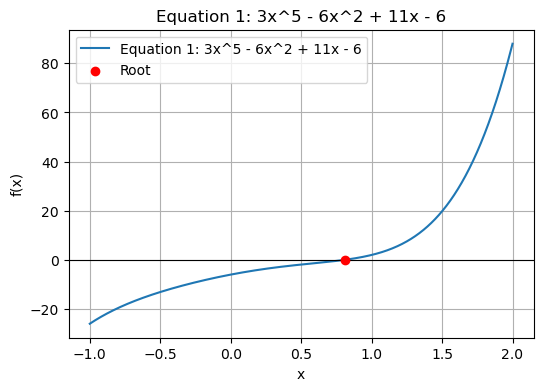

                                                                                                    
Equation 2: e^x + 3x^3 - Newton-Raphson Method Root: -0.57361, found in 4 iterations.


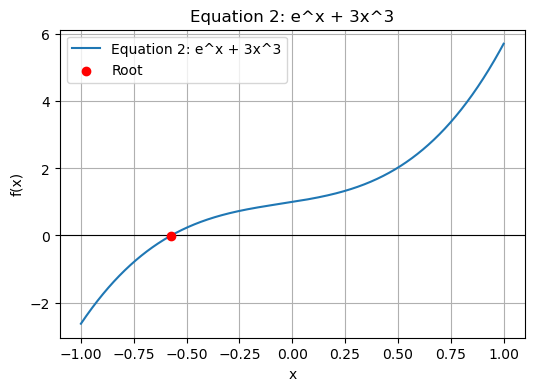

                                                                                                    
Equation 3: sin(x) + e^x - 3x - No real root found in the given interval [-2, 2]. The function may not cross the x-axis in this range or may have complex roots.


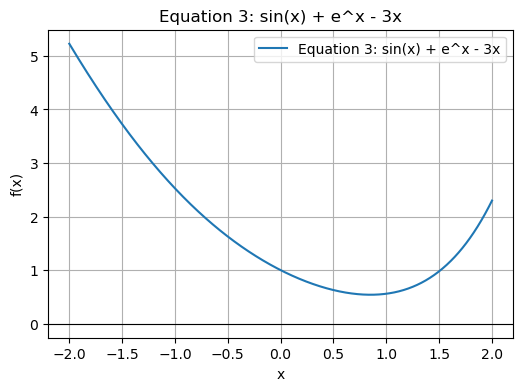

                                                                                                    
Equation 4: (4x - 3x^4)/e^sin(x) - Newton-Raphson Method Root: -0.00000, found in 3 iterations.


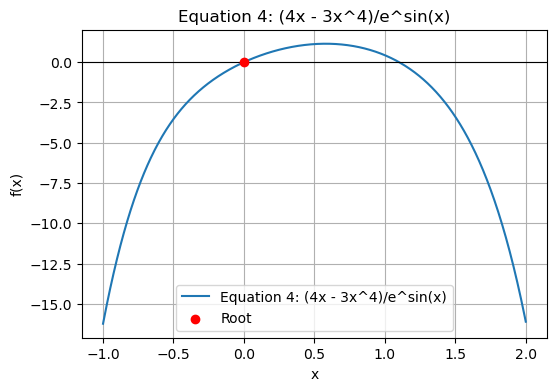

                                                                                                    
Equation 5: (2 + cos(x))/(3e^sin(x)) - No real root found in the given interval [-1, 1]. The function may not cross the x-axis in this range or may have complex roots.


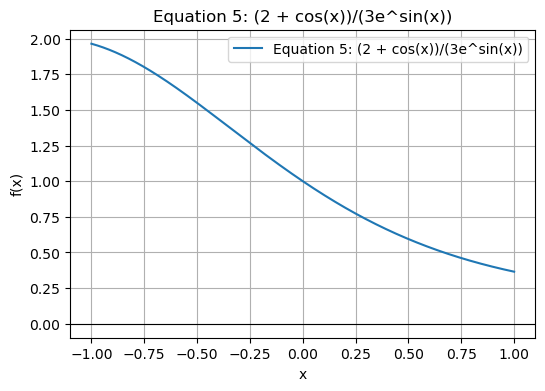

In [1]:
#raphson newton method

import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 3*x**5 - 6*x**2 + 11*x - 6

def df1(x):
    return 15*x**4 - 12*x + 11

def f2(x):
    return np.exp(x) + 3*x**3

def df2(x):
    return np.exp(x) + 9*x**2
    
def f3(x):
    return np.sin(x) + np.exp(x) - 3*x

def df3(x):
    return np.cos(x) + np.exp(x) - 3

def f4(x):
    return (4*x - 3*x**4) / np.exp(np.sin(x))

def df4(x):
    return (4 - 12*x**3) / np.exp(np.sin(x))

def f5(x):
    return (2 + np.cos(x)) / (3 * np.exp(np.sin(x)))

def df5(x): 
    return (-np.sin(x) * 3*np.exp(np.sin(x)) - (2 + np.cos(x)) * np.exp(np.sin(x)) * np.cos(x)) / (3 * np.exp(2*np.sin(x)))

def newton_raphson(f, df, x0, tol=0.05, max_iter=50):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:
            return None
        
        x_new = x - fx / dfx
        
        if abs(x_new - x) < tol:
            return x_new, i+1
        
        x = x_new
    
    return None

def plot_function(f, a, b, title, root=None):
    x = np.linspace(a, b, 1000)
    y = f(x)
    
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=f"{title}")
    plt.axhline(0, color='black', linewidth=0.8)
    
    if root is not None:
        plt.scatter(root, f(root), color='red', zorder=5, label="Root")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

functions = [
    (f1, df1, -1, 2, "Equation 1: 3x^5 - 6x^2 + 11x - 6"),
    (f2, df2, -1, 1, "Equation 2: e^x + 3x^3"),
    (f3, df3, -2, 2, "Equation 3: sin(x) + e^x - 3x"),
    (f4, df4, -1, 2, "Equation 4: (4x - 3x^4)/e^sin(x)"),
    (f5, df5, -1, 1, "Equation 5: (2 + cos(x))/(3e^sin(x))")
]

for f, df, a, b, title in functions:
    initial_guess = (a + b) / 2
    root_newton = newton_raphson(f, df, initial_guess)
    
    if root_newton:
        root, iterations = root_newton
        print(f"{title} - Newton-Raphson Method Root: {root:.5f}, found in {iterations} iterations.")
        plot_function(f, a, b, title, root=root)
    else:
        print(f"{title} - No real root found in the given interval [{a}, {b}]. The function may not cross the x-axis in this range or may have complex roots.")
        plot_function(f, a, b, title)
    
    print(" " * 100)